<a href="https://colab.research.google.com/github/lawalAfeez820/NLP/blob/main/SPAM_HAM_CLASSIFIER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DESCRIPTION

FITTING MACHINE LEARNING MODEL ON E-MAIL CORPUS TO DIFFERENTIATE BETWEEN SPAM AND HAM E-MAIL.

## DATASET

The dataset is an imbalanced one, the ham cstegory contain 86% of the whole dataset.

## APPROACH

The first step includ loading the tsv file into pandas dataframe for easy analysis, The dataset was split into train and test data in the beginning state to above data leakage(for the model not to have most of the data set during the training).All process was performed om the separated train data.
Since this is an NLP classification task,the necessary the preprocessing and cleaning was done on the train dataset.Some of the cleaning that was done on the data are:
1. Tokenization:Breaking sentences into words

2. Contraction to Expansion: Changing the contraction words to their expanded form e.g she'll--->she will

3. Converting all words to their lower cases

4. Lemmatization: Converting words to their root form. e.g sleeping--->sleep

5. Text Correction

6. Punctuation removal. 

After the text cleaning phase, all the sentences were converted to vectors and machine handle numericsl data better. Document to Vector that convert all the word into a vector size of 70 was implemented at first but after fitting these vector to some classification algorithm like logistic regression and GaussianNB, the performance was bad, i then try an ensemble technique (RandomForestClassifier) which overfit the training dataset i.e it classified all the train data perfectly(100%) but just 60% on the unseen data. At first, I thought this bad performance was due to the imbalanced nature of the dataset so i tried some technique that is used for handling imbalanced dataset but same result was generated(All technique in the notebook).

The next thing that was done after this bad result was to implement another word to vector algorithm apart from doc2vec, and this was TfidfVectorizer.After the conversion and training with random forest classifier, A better result was generated for both the train and unseen dataset.


## Libraries

1. Gensim for document to vector conversion

2. Pandas for some preprocessing

3. Contraction Library

4. Textblob library for text correction

5. Spacy Library for lemmatization

6. sklearn for model training

7. Imblearn for handling class imbalance




library



In [ ]:
#import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install contractions
import contractions
from gensim.models import Doc2Vec


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 106 kB 31.3 MB/s 
     |████████████████████████████████| 287 kB 38.0 MB/s 


In [ ]:
data=pd.read_csv("/content/spam.tsv",sep="\t")

In [ ]:
data.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [ ]:
data.shape

(5572, 4)

In [ ]:
data.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [ ]:
# spliting the data to training and test data to avoid data leakage
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(data["message"],data["label"],stratify=data["label"],test_size=0.2,random_state=42)

In [ ]:
x_train.head()

184                              He will, you guys close?
2171    CAN I PLEASE COME UP NOW IMIN TOWN.DONTMATTER ...
5422              Ok k..sry i knw 2 siva..tats y i askd..
4113                            I'll see, but prolly yeah
4588    I'll see if I can swing by in a bit, got some ...
Name: message, dtype: object

In [ ]:
x_train.shape

(4457,)

In [ ]:
y_train.value_counts(normalize=True)

ham     0.865829
spam    0.134171
Name: label, dtype: float64

In [ ]:
y_train.value_counts()

ham     3859
spam     598
Name: label, dtype: int64

#### this above infomation shows the data is imbalanced

# DATA EXPLORATION

1. Word counts

2. Stop words count

3. Upper case word count

4. Numeric data check

In [ ]:
train_data=pd.concat([x_train,y_train],axis=1)

In [ ]:
ham=train_data[train_data["label"]=="ham"].sample(2000)

In [ ]:
ham

,message,label
4631,Everybody had fun this evening. Miss you.,ham
4250,Loosu go to hospital. De dont let it careless.,ham
2062,Hey ! I want you ! I crave you ! I miss you ! ...,ham
2797,Tell your friends what you plan to do on Valen...,ham
1676,"Painful words- ""I thought being Happy was the ...",ham
...,...,...
3103,Even if he my friend he is a priest call him now,ham
5371,"Lol, oh you got a friend for the dog ?",ham
3740,Did you stitch his trouser,ham
1664,S but mostly not like that.,ham


In [ ]:
spam=train_data[train_data["label"]=="spam"]

In [ ]:
train_data=pd.concat([ham,spam],axis=0)

In [ ]:
train_data.head()

,message,label
4631,Everybody had fun this evening. Miss you.,ham
4250,Loosu go to hospital. De dont let it careless.,ham
2062,Hey ! I want you ! I crave you ! I miss you ! ...,ham
2797,Tell your friends what you plan to do on Valen...,ham
1676,"Painful words- ""I thought being Happy was the ...",ham


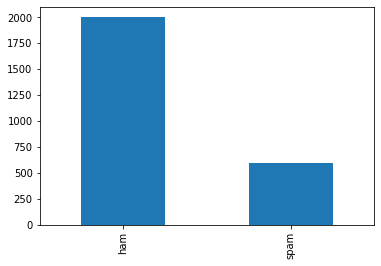

In [ ]:
train_data["label"].value_counts().plot(kind="bar")

In [ ]:
from nltk.corpus import stopwords

In [ ]:

import nltk
nltk.download('stopwords')
stop=list(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import re

def word_count(message):

  return len(message.split())

def stop_words(message):

  return len([word for word in message.split() if word in stop])


def digit_count(message):
  pattern=re.compile(" \d+ ")

  return len(pattern.findall(message))

 
def upper_case(message):

  return len([word for word in message.split() if word.isupper() and len(word)>1])

  






In [ ]:
train_data["word_count"]=train_data["message"].apply(word_count)

train_data["stop_words_count"]=train_data["message"].apply(stop_words)

train_data["digit_count"]=train_data["message"].apply(digit_count)

train_data["upper_case_count"]=train_data["message"].apply(upper_case)

In [ ]:
train_data.head()

,message,label,word_count,stop_words_count,digit_count,upper_case_count
4631,Everybody had fun this evening. Miss you.,ham,7,2,0,0
4250,Loosu go to hospital. De dont let it careless.,ham,9,2,0,0
2062,Hey ! I want you ! I crave you ! I miss you ! ...,ham,26,4,0,0
2797,Tell your friends what you plan to do on Valen...,ham,13,6,0,0
1676,"Painful words- ""I thought being Happy was the ...",ham,24,9,0,1


# CLEANING AND PREPROCESSING

1. Contraction to expansion

2. tokenization

3. punctuation removal

4. stop words removal

5. lemmatization

6. word correction

7. word lowering 

 



In [ ]:
from textblob import TextBlob,Word
import spacy
import string
puctuation=string.punctuation
nlp=nlp=spacy.load("en_core_web_sm")

In [ ]:


def clean(message):

  expansion=contractions.fix(message,slang=True)

  punctuation_pattern=re.compile("[punctuation]+ ")

  expansion=punctuation_pattern.sub("",expansion)

  message=" ".join(expansion.split())

  message=message.lower()

  message=str(TextBlob(message).correct())

  message=" ".join([str(nlp(doc)[0].lemma_) for doc in message.split()])

  message=" ".join([word for word in message.split() if word not in stop])

  return message

   

In [ ]:

%%time
train_data["cleaned"]=train_data["message"].apply(clean)

CPU times: user 26min 3s, sys: 3.96 s, total: 26min 7s
Wall time: 26min 16s


In [ ]:
 train_data.head()

,message,label,word_count,stop_words_count,digit_count,upper_case_count,cleaned
4631,Everybody had fun this evening. Miss you.,ham,7,2,0,0,everybody evening miss
4250,Loosu go to hospital. De dont let it careless.,ham,9,2,0,0,loosghospital de dlecareless
2062,Hey ! I want you ! I crave you ! I miss you ! ...,ham,26,4,0,0,hey ! I I grave I miss I need I love ahead sav...
2797,Tell your friends what you plan to do on Valen...,ham,13,6,0,0,tell friend whypldvalentine day @ &
1676,"Painful words- ""I thought being Happy was the ...",ham,24,9,0,1,"painful words- "" thoughbee happy mostoughesthe..."


# VECTORIZATION

In [ ]:
train_data["token"]=train_data["cleaned"].apply(lambda x : x.split())

In [ ]:
train_data.head(10)

,message,label,word_count,stop_words_count,digit_count,upper_case_count,cleaned,token
4631,Everybody had fun this evening. Miss you.,ham,7,2,0,0,everybody evening miss,"[everybody, evening, miss]"
4250,Loosu go to hospital. De dont let it careless.,ham,9,2,0,0,loosghospital de dlecareless,"[loosghospital, de, dlecareless]"
2062,Hey ! I want you ! I crave you ! I miss you ! ...,ham,26,4,0,0,hey ! I I grave I miss I need I love ahead sav...,"[hey, !, I, I, grave, I, miss, I, need, I, lov..."
2797,Tell your friends what you plan to do on Valen...,ham,13,6,0,0,tell friend whypldvalentine day @ &,"[tell, friend, whypldvalentine, day, @, &]"
1676,"Painful words- ""I thought being Happy was the ...",ham,24,9,0,1,"painful words- "" thoughbee happy mostoughesthe...","[painful, words-, "", thoughbee, happy, mostoug..."
4964,I want to see your pretty pussy...,ham,7,2,0,0,I see pretty hussy,"[I, see, pretty, hussy]"
2043,"Me not waking up until 4 in the afternoon, sup",ham,10,5,1,0,I wake 4 afternoon sup,"[I, wake, 4, afternoon, sup]"
84,Yup next stop.,ham,3,0,0,0,ynexstop,[ynexstop]
1579,How to Make a girl Happy? It's not at all diff...,ham,103,8,0,0,make girl happy difficulmake girl happy need 1...,"[make, girl, happy, difficulmake, girl, happy,..."
172,"Hmmm.. Thk sure got time to hop ard... Ya, can...",ham,20,3,1,0,mmm sure time hard go free mud call discuss liar,"[mmm, sure, time, hard, go, free, mud, call, d..."


In [ ]:
train_data_sample=train_data

In [ ]:
import gensim
vector_processing=[]
for i,j in enumerate(train_data["token"]):
  vector_processing.append(gensim.models.doc2vec.TaggedDocument(j,[i]))

In [ ]:
vector_processing

[TaggedDocument(words=['everybody', 'evening', 'miss'], tags=[0]),
 TaggedDocument(words=['loosghospital', 'de', 'dlecareless'], tags=[1]),
 TaggedDocument(words=['hey', '!', 'I', 'I', 'grave', 'I', 'miss', 'I', 'need', 'I', 'love', 'ahead', 'save', 'al', 'hall', '...'], tags=[2]),
 TaggedDocument(words=['tell', 'friend', 'whypldvalentine', 'day', '@', '&'], tags=[3]),
 TaggedDocument(words=['painful', 'words-', '"', 'thoughbee', 'happy', 'mostoughesthe', 'earth', 'toughesis', 'act', 'happy', 'unspokeinside'], tags=[4]),
 TaggedDocument(words=['I', 'see', 'pretty', 'hussy'], tags=[5]),
 TaggedDocument(words=['I', 'wake', '4', 'afternoon', 'sup'], tags=[6]),
 TaggedDocument(words=['ynexstop'], tags=[7]),
 TaggedDocument(words=['make', 'girl', 'happy', 'difficulmake', 'girl', 'happy', 'need', '1', 'friend', '2', 'come', 'lover', '4', 'chef', '.', '.', '.', '&', '.', 'good', 'listener', '&', '.', 'organizer', '&', '.', 'good', 'boyfriend', '&', '.', 'le', '&', '.', 'sympathy', '&', '.', '

In [ ]:


model=Doc2Vec(vector_size=70,min_count=2,epoch=50)

model.build_vocab(vector_processing)

model.train(vector_processing,total_examples=model.corpus_count,epochs=model.epochs)

In [ ]:
def dv_conversion(x):
    return model.infer_vector(x)


In [ ]:
%%time
x_train=train_data["token"].apply(dv_conversion)

CPU times: user 1.14 s, sys: 11 ms, total: 1.15 s
Wall time: 1.16 s


In [ ]:
x_train=np.array(list(x_train))

In [ ]:
x_train

array([[ 0.00035491,  0.00823677, -0.00562575, ...,  0.00348315,
         0.00112348, -0.00253744],
       [-0.00379992,  0.00630871, -0.00566949, ..., -0.003021  ,
        -0.00132076, -0.00119737],
       [ 0.00653396,  0.00130727,  0.00812866, ..., -0.00999874,
         0.00996769, -0.00165529],
       ...,
       [ 0.00410198,  0.00219859,  0.00357367, ..., -0.0114967 ,
         0.00467734, -0.00017179],
       [ 0.00085259,  0.00391166, -0.00185007, ..., -0.00653318,
         0.00449406,  0.00359438],
       [ 0.00648597,  0.01557529,  0.00038633, ..., -0.02559656,
         0.0182293 ,  0.0086731 ]], dtype=float32)

In [ ]:
x_train.shape

(2598, 70)

# MODELLING

In [ ]:
train_data["label"]=train_data["label"].map({"ham":0,"spam":1})

In [ ]:
from sklearn.linear_model import LogisticRegression

model1=LogisticRegression()

model1.fit(x_train,train_data["label"])

LogisticRegression()

In [ ]:
model1.score(x_train,train_data["label"])

0.8036951501154734

In [ ]:
from sklearn.naive_bayes import GaussianNB


model2=GaussianNB()

model2.fit(x_train,train_data["label"])

GaussianNB()

In [ ]:

model2.score(x_train,train_data["label"])

0.806774441878368

In [ ]:
from sklearn.ensemble import RandomForestClassifier


model3=RandomForestClassifier()

model3.fit(x_train,train_data["label"])

RandomForestClassifier()

In [ ]:
model3.score(x_train,train_data["label"])

1.0

##### Is this not an overfitting of the model? 

In [ ]:
train_data["label"].value_counts()

0    2000
1     598
Name: label, dtype: int64

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred=model3.predict(x_train)
print(classification_report(y_pred,train_data["label"]))
print(confusion_matrix(y_pred,train_data["label"]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2000
           1       1.00      1.00      1.00       598

    accuracy                           1.00      2598
   macro avg       1.00      1.00      1.00      2598
weighted avg       1.00      1.00      1.00      2598

[[2000    0]
 [   0  598]]


In [ ]:
%%time
x_test=x_test.apply(clean)

CPU times: user 10min 1s, sys: 1.68 s, total: 10min 3s
Wall time: 10min 3s


In [ ]:
 x_test

2825                          need buy lunch I I emaggmee
3695    ok sure time finish tomorrow spend evening cos...
3904              wait e car 4 sum let reach home already
576            w?1,000 cash ? prize claim call09050000327
2899                           @ home become dowwith5 min
                              ...                        
854     ah poor baby!hope feel well love probthat over...
5044                                 play 9 door sometime
2015                                              ambrine
3380                               dear ummshe call I :-)
785               think turn like randomlly with5mof open
Name: message, Length: 1115, dtype: object

In [ ]:
x_test=x_test.apply(lambda x : x.split())

In [ ]:
%%time
x_test=x_test.apply(dv_conversion)

CPU times: user 481 ms, sys: 10 ms, total: 491 ms
Wall time: 492 ms


In [ ]:
x_test=np.array(list(x_test))

In [ ]:
y_test=y_test.map({"ham":0,"spam":1})

In [ ]:
print(classification_report(model3.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91       993
           1       0.34      0.41      0.37       122

    accuracy                           0.85      1115
   macro avg       0.63      0.66      0.64      1115
weighted avg       0.86      0.85      0.85      1115



In [ ]:
from sklearn.metrics import roc_auc_score

print(roc_auc_score(model3.predict(x_test),y_test))

0.655069090188698


In [ ]:
print(confusion_matrix(model3.predict(x_test),y_test))

[[894  99]
 [ 72  50]]


In [ ]:
x_train_testing=pd.DataFrame(x_train)

In [ ]:
from imblearn.ensemble import RUSBoostClassifier,BalancedBaggingClassifier,BalancedRandomForestClassifier


model4=RUSBoostClassifier()



In [ ]:
model4.fit(x_train_testing,train_data["label"])

RUSBoostClassifier()

In [ ]:
print(roc_auc_score(model4.predict(x_test),y_test))

0.6093902102667271


In [ ]:
model5=BalancedRandomForestClassifier()
model5.fit(x_train_testing,train_data["label"])
print(roc_auc_score(model5.predict(x_test),y_test))

0.6502862985685072


In [ ]:
train_data_sample

,message,label,word_count,stop_words_count,digit_count,upper_case_count,cleaned,token
4631,Everybody had fun this evening. Miss you.,0,7,2,0,0,everybody evening miss,"[everybody, evening, miss]"
4250,Loosu go to hospital. De dont let it careless.,0,9,2,0,0,loosghospital de dlecareless,"[loosghospital, de, dlecareless]"
2062,Hey ! I want you ! I crave you ! I miss you ! ...,0,26,4,0,0,hey ! I I grave I miss I need I love ahead sav...,"[hey, !, I, I, grave, I, miss, I, need, I, lov..."
2797,Tell your friends what you plan to do on Valen...,0,13,6,0,0,tell friend whypldvalentine day @ &,"[tell, friend, whypldvalentine, day, @, &]"
1676,"Painful words- ""I thought being Happy was the ...",0,24,9,0,1,"painful words- "" thoughbee happy mostoughesthe...","[painful, words-, "", thoughbee, happy, mostoug..."
...,...,...,...,...,...,...,...,...
2897,pdate_Now - Double mins and 1000 txts on Orang...,1,24,4,2,1,pdate_now - double mind 1000 txt orange tariff...,"[pdate_now, -, double, mind, 1000, txt, orange..."
1688,Free Top ringtone -sub to weekly ringtone-get ...,1,16,2,0,1,free trigone -sub weekly ringtone free supply ...,"[free, trigone, -sub, weekly, ringtone, free, ..."
3289,Someone U know has asked our dating service 2 ...,1,25,5,2,3,someone know ask date service 2 guess call 090...,"[someone, know, ask, date, service, 2, guess, ..."
2309,Moby Pub Quiz.Win a £100 High Street prize if ...,1,30,8,1,2,mob pub quit.w£100 high streeprize know wythe ...,"[mob, pub, quit.w£100, high, streeprize, know,..."


In [ ]:
new_train_x=pd.DataFrame(x_train)

In [ ]:
new_train_x.head()

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,0.000355,0.008237,-0.005626,-0.005128,0.001241,0.009651,-0.001611,0.006053,0.007502,0.007208,...,0.011626,0.001602,-0.007718,-0.000748,0.012078,0.000852,-0.001937,0.003483,0.001123,-0.002537
1,-0.003800,0.006309,-0.005669,0.003732,0.003276,0.004091,0.005304,0.003929,-0.004975,-0.000876,...,0.003641,0.002666,-0.009468,-0.002592,-0.004771,0.002273,-0.005724,-0.003021,-0.001321,-0.001197
2,0.006534,0.001307,0.008129,-0.017326,-0.004356,0.020816,-0.016001,0.025999,0.014878,0.006917,...,0.020966,0.007745,-0.028136,0.005395,0.027011,-0.005339,-0.004209,-0.009999,0.009968,-0.001655
3,0.001190,0.001850,0.004645,-0.002574,-0.001003,0.011309,-0.009001,0.001067,0.004471,0.003681,...,0.007558,-0.001847,-0.003381,0.005044,0.013376,-0.001975,-0.001992,-0.001372,-0.002822,0.003607
4,-0.001359,-0.001771,0.004729,-0.014217,0.003563,0.001238,-0.012155,0.007696,0.004924,0.012931,...,0.007327,0.007659,-0.009526,0.008376,0.009823,-0.003974,0.000363,-0.001393,0.006182,0.001160


In [ ]:
train_data["label"].value_counts()

0    2000
1     598
Name: label, dtype: int64

In [ ]:
from imblearn.under_sampling import ClusterCentroids

under_sample=ClusterCentroids(sampling_strategy=1)

x_train_clus,y_train_clus=under_sample.fit_resample(new_train_x,train_data["label"])

In [ ]:
y_train_clus.value_counts()

0    598
1    598
Name: label, dtype: int64

In [ ]:
model6=BalancedRandomForestClassifier()
model6.fit(x_train_clus,y_train_clus)
print(roc_auc_score(model6.predict(x_test),y_test))

0.6323732189367244


In [ ]:
model7=RUSBoostClassifier()
model7.fit(x_train_clus,y_train_clus)
print(roc_auc_score(model7.predict(x_test),y_test))



0.590479797979798


In [ ]:
model8=RandomForestClassifier()
model8.fit(x_train_clus,y_train_clus)
print(roc_auc_score(model8.predict(x_test),y_test))

0.6332911429449379


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf=TfidfVectorizer()
vec_x=tf.fit_transform(train_data_sample["cleaned"])


In [ ]:
model1.fit(vec_x,train_data_sample["label"])

LogisticRegression()

In [ ]:
model1.score(vec_x,train_data_sample["label"])

0.9491916859122402

In [ ]:
roc_auc_score(model1.predict(vec_x),train_data_sample["label"])

0.958536006300234

In [ ]:

x_train,x_test,y_train,y_test=train_test_split(data["message"],data["label"],stratify=data["label"],test_size=0.2,random_state=42)

In [ ]:
%%time
x_test=x_test.apply(clean)

CPU times: user 10min 1s, sys: 1.8 s, total: 10min 3s
Wall time: 10min 4s


In [ ]:
 x_text_copy=x_test

In [ ]:
vec_x_test=tf.transform(x_test)

In [ ]:
y_test=y_test.map({"ham":0,"spam":1})

In [ ]:
print(classification_report(model1.predict(vec_x_test),y_test))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1002
           1       0.73      0.96      0.83       113

    accuracy                           0.96      1115
   macro avg       0.86      0.96      0.90      1115
weighted avg       0.97      0.96      0.96      1115



In [ ]:
model3.fit(vec_x,train_data_sample["label"])

print(classification_report(model3.predict(vec_x_test),y_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       994
           1       0.81      1.00      0.90       121

    accuracy                           0.97      1115
   macro avg       0.91      0.99      0.94      1115
weighted avg       0.98      0.97      0.98      1115



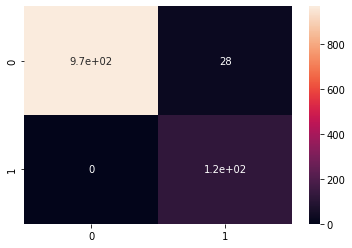

In [ ]:
import seaborn as sns

sns.heatmap(confusion_matrix(model3.predict(vec_x_test),y_test),annot=True);
